In [104]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.datasets import imdb
from keras.datasets import reuters
from keras.datasets import boston_housing
from keras import models
from keras import layers
from keras import optimizers
from keras.optimizer_v2 import rmsprop as rmsprop_v2
from tensorflow import keras
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
# optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

## Classifying movie reviews: a binary classification example
### The IMDB dataset

In [105]:
# Loading the IMDB dataset
# IMDB dataset: a set of 50,000 highly polarized reviews from the
    # Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
    # reviews for testing, each set consisting of 50% negative and 50% positive reviews
# Argument num_words = 10000 means we will only keep the top 10,000 most frequently occurring words in the training data. 
    # Rare words will be discarded. 
    # This allows us to work with vector data of manageable size.
# train_labels and test_labels are lists of 0s and 1s, 
    # 0: negative
    # 1: positive:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [106]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [107]:
train_labels[0]

1

In [108]:
# Because we are restricting ourselves to the top 10,000 most frequent words, 
    # no word index will exceed 10,000:
max([max(sequence) for sequence in train_data])

9999

In [110]:
# Encoding the integer sequences into a binary matrix
    # can’t feed lists of integers into a neural network, so we turn the lists into tensors by:
        # Pad the lists so that they all have the same length, turn them into an integer 
            # tensor of shape (samples, word_indices), and then use as the first layer in
            # the network a layer capable of handling such integer tensors 
        # One-hot encode the lists to turn them into vectors of 0s and 1s. Then we could use as the 
            # first layer in the network a Dense layer, capable of handling floating-point vector data
    # we will go with second option to vectorize the data
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences): # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [111]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [113]:
# vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [114]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [117]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
# Configuring the optimizer
# optimizer=keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [119]:
# Using custom losses and metrics
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])

In [120]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [121]:
# model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), 
    # in mini-batches of 512 samples. At the same time, monitor loss and accuracy on the 10,000 
    # samples that we set apart by passing the validation data as the validation_data argument.
# training model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 198ms/step - loss: 0.5237 - acc: 0.7755 - val_loss: 0.4124 - val_acc: 0.8548
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.3138 - acc: 0.9030 - val_loss: 0.3182 - val_acc: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2298 - acc: 0.9289 - val_loss: 0.2855 - val_acc: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1789 - acc: 0.9425 - val_loss: 0.2789 - val_acc: 0.8888
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1476 - acc: 0.9553 - val_loss: 0.2830 - val_acc: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1172 - acc: 0.9671 - val_loss: 0.3130 - val_acc: 0.8756
Epoch 7/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1007 - acc: 0.9713 - val_loss: 0.3082 - val_acc: 0.8826
Epoch 8/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0811 - 

In [122]:
# the call to model.fit() returns a History object. This object has a member history, 
    # which is a dictionary containing data about everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

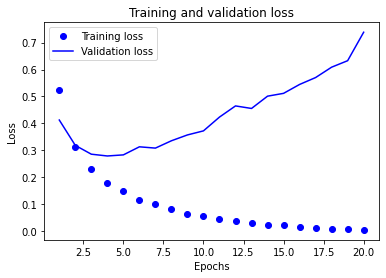

In [123]:
# Plotting the training and validation loss
history_dict = history.history
acc_values = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') # “bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # “b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# training loss decreases with every epoch,

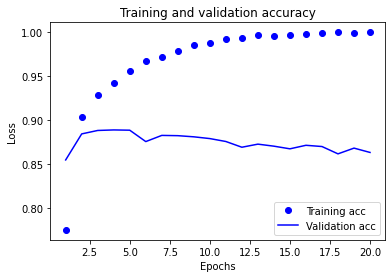

In [124]:
# Plotting the training and validation accuracy
plt.clf() # Clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# training accuracy increases with every epoch
# That’s what you would expect when running gradient descent optimization—the quantity you’re trying to 
    # minimize should be less with every iteration
# overfitting: model that performs better on the training data isn’t necessarily a model that will do
    # better on data it has never seen before

In [125]:
# we want to prevent overfitting, so we will train a new network from scratch for four epochs 
    # and then evaluate it on the test data
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 50ms/step - loss: 0.4856 - accuracy: 0.8027 1s - ETA: 0s - loss: 0.5346 
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2759 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 2s 39ms/step - loss: 0.2100 - accuracy: 0.9271
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.2896 - accuracy: 0.8859


In [126]:
# This naive approach achieves an accuracy of 88%
results

[0.289615660905838, 0.885919988155365]

In [128]:
# network is confident for some samples (0.99 or more, or 0.09 or
    # less) but less confident for others (0.7)
model.predict(x_test)

array([[0.16103536],
       [0.9980242 ],
       [0.84311616],
       ...,
       [0.13672844],
       [0.06350344],
       [0.5081781 ]], dtype=float32)

In [129]:
# we want to prevent overfitting, so we will train a new network from scratch for four epochs 
    # and then evaluate it on the test data
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 52ms/step - loss: 0.4522 - accuracy: 0.8297
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2804 - accuracy: 0.9070
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2219 - accuracy: 0.9250
Epoch 4/4
782/782 [==============================] - 7s 9ms/step - loss: 0.2796 - accuracy: 0.8885


In [130]:
results

[0.2796395719051361, 0.8885200023651123]

In [131]:
# we want to prevent overfitting, so we will train a new network from scratch for four epochs 
    # and then evaluate it on the test data
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 48ms/step - loss: 0.4596 - accuracy: 0.8120
Epoch 2/4
49/49 [==============================] - 2s 40ms/step - loss: 0.2565 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.1958 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.3386 - accuracy: 0.8715


In [132]:
results

[0.3386026620864868, 0.8715199828147888]

In [133]:
# we want to prevent overfitting, so we will train a new network from scratch for four epochs 
    # and then evaluate it on the test data
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 48ms/step - loss: 0.4230 - accuracy: 0.8294
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2300 - accuracy: 0.9145
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1754 - accuracy: 0.9352
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.3235 - accuracy: 0.8796


In [134]:
results

[0.3235030472278595, 0.8796399831771851]

In [135]:
# we want to prevent overfitting, so we will train a new network from scratch for four epochs 
    # and then evaluate it on the test data
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 48ms/step - loss: 0.1491 - accuracy: 0.8198
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0782 - accuracy: 0.9129
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0581 - accuracy: 0.9326
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.0863 - accuracy: 0.8832


In [136]:
results

[0.08628930896520615, 0.8832399845123291]

In [60]:
# we want to prevent overfitting, so we will train a new network from scratch for four epochs 
    # and then evaluate it on the test data
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 33ms/step - loss: 0.1317 - accuracy: 0.8174
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.0667 - accuracy: 0.9129
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.0517 - accuracy: 0.9328
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.0966 - accuracy: 0.8753


In [61]:
# This naive approach achieves an accuracy of 88%
results

[0.09656553715467453, 0.8752800226211548]

In [62]:
# network is confident for some samples (0.99 or more, or 0.07 or
    # less) but less confident for others (0.7)
model.predict(x_test)

array([[0.06449416],
       [0.9994958 ],
       [0.67489994],
       ...,
       [0.28076956],
       [0.03275594],
       [0.32294607]], dtype=float32)

## Classifying newswires: a multiclass classification example
### The Reuters dataset

In [137]:
# Reuters dataset: a set of short newswires and their topics, published by Reuters in 1986.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [138]:
#  8982 training example
len(train_data)

8982

In [139]:
# 2246 test examples
len(test_data)

2246

In [66]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [140]:
# Vectorize/Encoding the data
# cast the label list as an integer tensor
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized testing data

In [141]:
# Vectorize/Encoding the data
# one-hot encoding (categorical encoding)
    # widely used format for categorical data
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels) # Vectorized training data
one_hot_test_labels = to_one_hot(test_labels) # Vectorized testing data

In [142]:
# Model definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [143]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
# Setting aside a validation set
    # Set apart 1000 samples in the training data to use as a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [145]:
# Training the model
    #  train the network for 20 epochs.
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 119ms/step - loss: 2.6365 - accuracy: 0.5227 - val_loss: 1.7368 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 73ms/step - loss: 1.4086 - accuracy: 0.7108 - val_loss: 1.3587 - val_accuracy: 0.6780
Epoch 3/20
16/16 [==============================] - 1s 73ms/step - loss: 1.0387 - accuracy: 0.7722 - val_loss: 1.1226 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 77ms/step - loss: 0.8154 - accuracy: 0.8245 - val_loss: 1.0130 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 0.6520 - accuracy: 0.8638 - val_loss: 0.9874 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 1s 71ms/step - loss: 0.5209 - accuracy: 0.8931 - val_loss: 0.9180 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 82ms/step - loss: 0.4191 - accuracy: 0.9149 - val_loss: 0.9002 - val_accuracy: 0.8130
Epoch 8/20
1

In [146]:
# the call to model.fit() returns a History object. This object has a member history, 
    # which is a dictionary containing data about everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

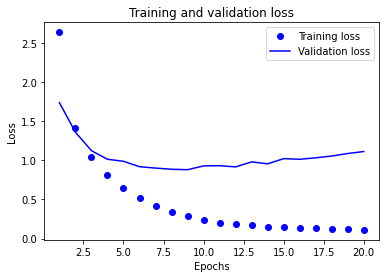

In [147]:
# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

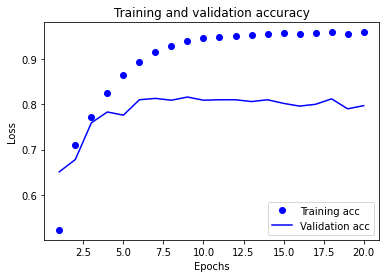

In [148]:
# Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# The network begins to overfit after 9/10 epochs.

In [149]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 5s 147ms/step - loss: 2.6431 - accuracy: 0.5371 - val_loss: 1.7460 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 1s 82ms/step - loss: 1.4300 - accuracy: 0.6999 - val_loss: 1.3219 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 71ms/step - loss: 1.0620 - accuracy: 0.7754 - val_loss: 1.1361 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 1s 58ms/step - loss: 0.8294 - accuracy: 0.8203 - val_loss: 1.0282 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 1s 74ms/step - loss: 0.6581 - accuracy: 0.8614 - val_loss: 0.9678 - val_accuracy: 0.8100
Epoch 6/9
16/16 [==============================] - 1s 67ms/step - loss: 0.5200 - accuracy: 0.8935 - val_loss: 0.9338 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 69ms/step - loss: 0.4217 - accuracy: 0.9142 - val_loss: 0.9275 - val_accuracy: 0.8130
Epoch 8/9
16/16 [==

In [77]:
results

[0.9606444239616394, 0.7934104800224304]

In [78]:
# Generating predictions for new data
predictions = model.predict(x_test)

In [79]:
# Each entry in predictions is a vector of length 46
predictions[0].shape

(46,)

In [80]:
# The coefficients in this vector sum to 1
np.sum(predictions[0])

1.0

In [81]:
# The largest entry is the predicted class—the class with the highest probability
np.argmax(predictions[0])

3

In [83]:
predictions

array([[1.3666414e-03, 3.8953491e-05, 9.1892114e-05, ..., 2.1686239e-05,
        1.1355438e-05, 2.7190122e-06],
       [1.4787992e-03, 7.1912222e-03, 1.6449343e-03, ..., 1.4987765e-02,
        1.0286891e-06, 9.4612094e-04],
       [3.5687108e-03, 2.5964832e-01, 1.2194702e-02, ..., 4.4800737e-03,
        3.4424917e-05, 2.9020971e-03],
       ...,
       [2.2120732e-04, 7.8071316e-04, 3.9115854e-04, ..., 1.4546621e-05,
        2.0327747e-05, 2.5745137e-06],
       [2.0206866e-03, 4.2566095e-02, 1.1777052e-02, ..., 2.0185101e-03,
        2.9022875e-04, 2.0387773e-04],
       [1.9870300e-04, 5.8181393e-01, 1.0298229e-02, ..., 7.7409489e-04,
        7.3847434e-05, 1.5068812e-04]], dtype=float32)

In [150]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 65ms/step - loss: 3.5808 - accuracy: 0.1411 - val_loss: 3.2580 - val_accuracy: 0.3570
Epoch 2/9
16/16 [==============================] - 1s 39ms/step - loss: 2.9643 - accuracy: 0.3696 - val_loss: 2.6717 - val_accuracy: 0.3890
Epoch 3/9
16/16 [==============================] - 0s 30ms/step - loss: 2.3872 - accuracy: 0.4622 - val_loss: 2.1719 - val_accuracy: 0.5530
Epoch 4/9
16/16 [==============================] - 1s 40ms/step - loss: 1.8869 - accuracy: 0.5987 - val_loss: 1.7698 - val_accuracy: 0.6080
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 1.5307 - accuracy: 0.6688 - val_loss: 1.5372 - val_accuracy: 0.6520
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 1.3068 - accuracy: 0.7284 - val_loss: 1.4028 - val_accuracy: 0.6820
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 1.1579 - accuracy: 0.7578 - val_loss: 1.3117 - val_accuracy: 0.7010
Epoch 8/9
16/16 [===

In [151]:
results

[1.2278814315795898, 0.7203918099403381]

In [152]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 4s 135ms/step - loss: 3.0981 - accuracy: 0.4762 - val_loss: 2.3840 - val_accuracy: 0.5380
Epoch 2/9
16/16 [==============================] - 1s 38ms/step - loss: 2.0231 - accuracy: 0.5744 - val_loss: 1.7599 - val_accuracy: 0.6000
Epoch 3/9
16/16 [==============================] - 1s 42ms/step - loss: 1.5419 - accuracy: 0.6641 - val_loss: 1.4767 - val_accuracy: 0.6780
Epoch 4/9
16/16 [==============================] - 1s 37ms/step - loss: 1.2754 - accuracy: 0.7255 - val_loss: 1.3360 - val_accuracy: 0.6940
Epoch 5/9
16/16 [==============================] - 1s 38ms/step - loss: 1.0985 - accuracy: 0.7596 - val_loss: 1.2339 - val_accuracy: 0.7190
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.9630 - accuracy: 0.7919 - val_loss: 1.1595 - val_accuracy: 0.7530
Epoch 7/9
16/16 [==============================] - 1s 41ms/step - loss: 0.8484 - accuracy: 0.8160 - val_loss: 1.1034 - val_accuracy: 0.7630
Epoch 8/9
16/16 [==

In [153]:
results

[1.0887371301651, 0.7515583038330078]

In [154]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 4s 151ms/step - loss: 2.2006 - accuracy: 0.5549 - val_loss: 1.4038 - val_accuracy: 0.6830
Epoch 2/9
16/16 [==============================] - 2s 100ms/step - loss: 1.1146 - accuracy: 0.7566 - val_loss: 1.1440 - val_accuracy: 0.7470
Epoch 3/9
16/16 [==============================] - 2s 128ms/step - loss: 0.7791 - accuracy: 0.8309 - val_loss: 0.9963 - val_accuracy: 0.7790
Epoch 4/9
16/16 [==============================] - 2s 141ms/step - loss: 0.5724 - accuracy: 0.8806 - val_loss: 0.9227 - val_accuracy: 0.8050
Epoch 5/9
16/16 [==============================] - 2s 122ms/step - loss: 0.4167 - accuracy: 0.9110 - val_loss: 0.9210 - val_accuracy: 0.8160
Epoch 6/9
16/16 [==============================] - 2s 103ms/step - loss: 0.3199 - accuracy: 0.9326 - val_loss: 0.9261 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 2s 110ms/step - loss: 0.2497 - accuracy: 0.9445 - val_loss: 0.8866 - val_accuracy: 0.8230
Epoch 8/9
16/

In [155]:
results

[1.0783967971801758, 0.7876224517822266]

In [82]:
# A model with an information bottleneck
    # what happens when you introduce an information bottleneck by having intermediate layers 
    # that are significantly less than 46-dimensional: for example, 4-dimensional
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
# The network now peaks at ~71% validation accuracy, a 10% absolute drop. This drop
    # is mostly due to the fact that you’re trying to compress a lot of information (enough
    # information to recover the separation hyperplanes of 46 classes) into an intermediate
    # space that is too low-dimensional. The network is able to cram most of the necessary
    # information into these eight-dimensional representations, but not all of it.

Epoch 1/20
63/63 [==============================] - 4s 36ms/step - loss: 3.4940 - accuracy: 0.3170 - val_loss: 3.1680 - val_accuracy: 0.5510
Epoch 2/20
63/63 [==============================] - 2s 30ms/step - loss: 2.8755 - accuracy: 0.5861 - val_loss: 2.7955 - val_accuracy: 0.5970
Epoch 3/20
63/63 [==============================] - 2s 31ms/step - loss: 2.5614 - accuracy: 0.6203 - val_loss: 2.6262 - val_accuracy: 0.6190
Epoch 4/20
63/63 [==============================] - 2s 32ms/step - loss: 2.3759 - accuracy: 0.6320 - val_loss: 2.5531 - val_accuracy: 0.6160
Epoch 5/20
63/63 [==============================] - 2s 30ms/step - loss: 2.2228 - accuracy: 0.6180 - val_loss: 2.4136 - val_accuracy: 0.4870
Epoch 6/20
63/63 [==============================] - 2s 28ms/step - loss: 1.9686 - accuracy: 0.4320 - val_loss: 2.0643 - val_accuracy: 0.3700
Epoch 7/20
63/63 [==============================] - 2s 28ms/step - loss: 1.4311 - accuracy: 0.6280 - val_loss: 1.5900 - val_accuracy: 0.6460
Epoch 8/20
63

In [84]:
results

[0.9606444239616394, 0.7934104800224304]

In [85]:
model.predict(x_test)

array([[5.3314965e-12, 1.6399132e-05, 6.8123276e-12, ..., 6.0570879e-13,
        2.5522895e-16, 5.4831864e-21],
       [3.6034580e-02, 2.9873043e-02, 4.8500355e-03, ..., 3.1426868e-03,
        8.0078123e-03, 1.9425303e-03],
       [6.8641393e-03, 8.1076927e-02, 6.4238055e-05, ..., 3.4683751e-05,
        7.1229826e-04, 5.8065275e-06],
       ...,
       [8.9661889e-11, 3.2217499e-06, 1.2765833e-10, ..., 6.7094728e-12,
        1.8005118e-17, 5.2345257e-21],
       [7.1637558e-05, 2.7696699e-02, 7.0253904e-05, ..., 4.6034769e-05,
        2.3620283e-04, 3.8514418e-06],
       [8.5449187e-08, 6.6752034e-01, 2.8968982e-13, ..., 6.0683263e-14,
        3.7990269e-10, 3.1398763e-18]], dtype=float32)

In [87]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 72ms/step - loss: 2.9618 - accuracy: 0.4992 - val_loss: 2.2456 - val_accuracy: 0.5830
Epoch 2/9
16/16 [==============================] - 1s 35ms/step - loss: 1.8949 - accuracy: 0.6338 - val_loss: 1.6646 - val_accuracy: 0.6480
Epoch 3/9
16/16 [==============================] - 1s 46ms/step - loss: 1.4267 - accuracy: 0.7036 - val_loss: 1.3851 - val_accuracy: 0.6930
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 1.1548 - accuracy: 0.7486 - val_loss: 1.2357 - val_accuracy: 0.7260
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.9733 - accuracy: 0.7893 - val_loss: 1.1369 - val_accuracy: 0.7530
Epoch 6/9
16/16 [==============================] - 1s 37ms/step - loss: 0.8308 - accuracy: 0.8234 - val_loss: 1.0818 - val_accuracy: 0.7750
Epoch 7/9
16/16 [==============================] - 1s 40ms/step - loss: 0.7140 - accuracy: 0.8467 - val_loss: 1.0247 - val_accuracy: 0.7880
Epoch 8/9
16/16 [===

In [88]:
results

[1.0248914957046509, 0.7693677544593811]

In [89]:
model.predict(x_test)

array([[1.0394785e-05, 3.4453984e-05, 1.9872386e-06, ..., 1.4082101e-05,
        5.0609046e-06, 4.2230672e-06],
       [9.3450267e-03, 5.8737900e-02, 1.5923161e-02, ..., 1.9436935e-03,
        7.3447218e-04, 5.1124516e-05],
       [4.0173675e-03, 2.3075500e-01, 7.3836952e-02, ..., 6.6245361e-03,
        1.9821425e-03, 3.3723452e-04],
       ...,
       [6.7652116e-05, 8.9018758e-05, 2.2945389e-05, ..., 4.6602272e-05,
        6.3995620e-05, 2.7446875e-05],
       [1.7795253e-03, 3.1178715e-03, 1.0976729e-03, ..., 3.7589399e-04,
        5.1325531e-04, 4.7374427e-04],
       [1.2618431e-03, 3.4344774e-01, 6.9524497e-02, ..., 8.6244853e-04,
        4.8794725e-04, 3.0042356e-05]], dtype=float32)

In [90]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 18s 1s/step - loss: 2.2290 - accuracy: 0.5155 - val_loss: 1.4408 - val_accuracy: 0.6750
Epoch 2/9
16/16 [==============================] - 3s 189ms/step - loss: 1.1722 - accuracy: 0.7428 - val_loss: 1.1386 - val_accuracy: 0.7580
Epoch 3/9
16/16 [==============================] - 5s 296ms/step - loss: 0.8181 - accuracy: 0.8270 - val_loss: 1.0013 - val_accuracy: 0.7930
Epoch 4/9
16/16 [==============================] - 3s 171ms/step - loss: 0.5822 - accuracy: 0.8737 - val_loss: 0.9411 - val_accuracy: 0.8020
Epoch 5/9
16/16 [==============================] - 2s 144ms/step - loss: 0.4262 - accuracy: 0.9085 - val_loss: 0.8814 - val_accuracy: 0.8140
Epoch 6/9
16/16 [==============================] - 2s 121ms/step - loss: 0.3230 - accuracy: 0.9297 - val_loss: 0.8680 - val_accuracy: 0.8180
Epoch 7/9
16/16 [==============================] - 2s 124ms/step - loss: 0.2501 - accuracy: 0.9420 - val_loss: 0.9483 - val_accuracy: 0.8010
Epoch 8/9
16/16

## Predicting house prices: a regression example
### The Boston Housing Price dataset

In [91]:
# Boston Housing Price dataset: predict the median price of homes in a given Boston suburb in the
    # mid-1970s, given data points about the suburb at the time, such as the crime rate, the
    # local property tax rate, and so on
# Loading the Boston housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [92]:
train_data.shape

(404, 13)

In [93]:
test_data.shape

(102, 13)

In [94]:
# prices are typically between $10,000 and $50,000
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [95]:
# It would be problematic to feed into a neural network values that all take wildly different ranges
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [96]:
# Model definition
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [95]:
# K-fold validation
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # Prepares the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0) # Prepares the training data: data from all other partitions
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model() # Builds the Keras model (already compiled)
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0) # Trains the model (in silent mode, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # Evaluates the model on the validation data
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [96]:
all_scores
# different runs do indeed show rather different validation scores, from 2.0 to 2.8.
    # The average (2.6) is a much more reliable metric than any single score—that’s the
    # entire point of K-fold cross-validation. In this case, you’re off by $2600 on average,
    # which is significant considering that the prices range from $10,000 to $50,000.

[2.071929454803467, 2.8327410221099854, 2.794664144515991, 2.6851916313171387]

In [97]:
np.mean(all_scores)

2.5961315631866455

In [102]:
# try training the network a bit longer: 500 epochs
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # Prepares the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0) # # Prepares the training data: data from all other partitions
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model() # Builds the Keras model (already compiled)
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0) # Trains the model (in silent mode, verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [103]:
# the call to model.fit() returns a History object. This object has a member history, 
    # which is a dictionary containing data about everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [104]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

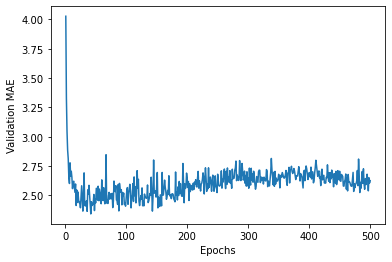

In [105]:
# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

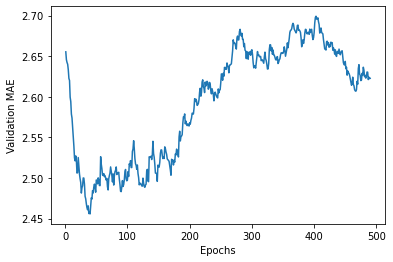

In [106]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [107]:
# Training the final model
model = build_model() # Gets a fresh, compiled model
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0) # Trains it on the entirety of the data
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 6ms/step - loss: 18.7271 - mae: 2.9375


In [108]:
test_mae_score

2.93747615814209